In [57]:
import os
import numpy as np
import cv2
import imutils
import random
import mahotas

from IPython.display import display, Image
from matplotlib import pyplot as plt

%matplotlib inline

In [58]:
airplane_datapath = "/Users/sam/All-Program/App-DataSet/Kaggle-Challenges/CIFAR-10/trainDataAirplane/"
cat_datapath = "/Users/sam/All-Program/App-DataSet/Kaggle-Challenges/CIFAR-10/trainDataCat/"

In [59]:
dirDict = [airplane_datapath,cat_datapath]

imagePath = []
for dirs in dirDict:
    dir_arr = os.listdir(dirs)
    random.shuffle(dir_arr)
    files = dir_arr[10:20]
    imagePath += [dirs+f for f in files]
print (imagePath)

['/Users/sam/All-Program/App-DataSet/Kaggle-Challenges/CIFAR-10/trainDataAirplane/10953.png', '/Users/sam/All-Program/App-DataSet/Kaggle-Challenges/CIFAR-10/trainDataAirplane/14699.png', '/Users/sam/All-Program/App-DataSet/Kaggle-Challenges/CIFAR-10/trainDataAirplane/43784.png', '/Users/sam/All-Program/App-DataSet/Kaggle-Challenges/CIFAR-10/trainDataAirplane/2933.png', '/Users/sam/All-Program/App-DataSet/Kaggle-Challenges/CIFAR-10/trainDataAirplane/48097.png', '/Users/sam/All-Program/App-DataSet/Kaggle-Challenges/CIFAR-10/trainDataAirplane/5350.png', '/Users/sam/All-Program/App-DataSet/Kaggle-Challenges/CIFAR-10/trainDataAirplane/15289.png', '/Users/sam/All-Program/App-DataSet/Kaggle-Challenges/CIFAR-10/trainDataAirplane/6371.png', '/Users/sam/All-Program/App-DataSet/Kaggle-Challenges/CIFAR-10/trainDataAirplane/16317.png', '/Users/sam/All-Program/App-DataSet/Kaggle-Challenges/CIFAR-10/trainDataAirplane/35328.png', '/Users/sam/All-Program/App-DataSet/Kaggle-Challenges/CIFAR-10/trainData

In [60]:
def vizualize(imageArray, rows, columns):
    fig1, axs = plt.subplots(rows,columns, figsize=(25, 6), facecolor='y', edgecolor='k')
    axs = axs.ravel()
    for no, image in enumerate(imageArray):
        axs[no].imshow(image)

In [61]:
def image_standarize1(image):
    return(image - 255.0/2)/255.0

def image_standarize2(image):
    return(image/255.0)

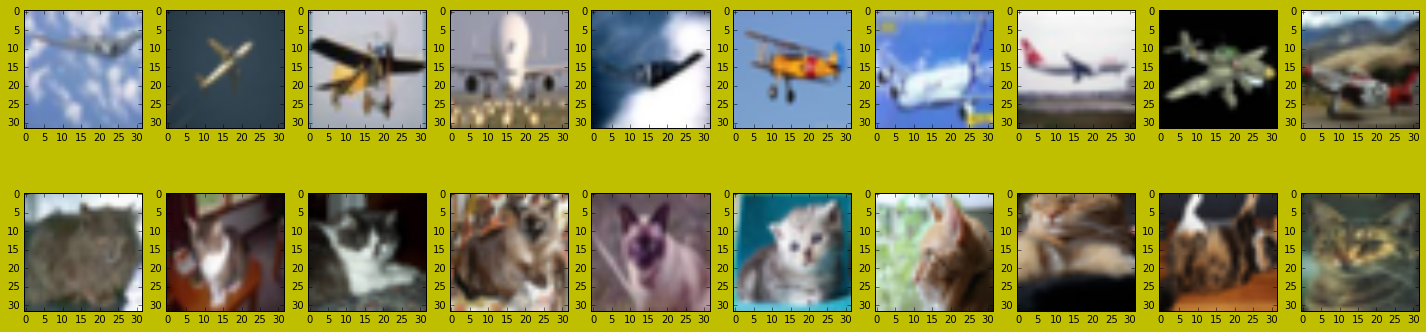

In [62]:
imageArr = [cv2.imread(img) for img in imagePath] 
imageArr = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in imageArr]
vizualize(imageArr,rows=2,columns=10)

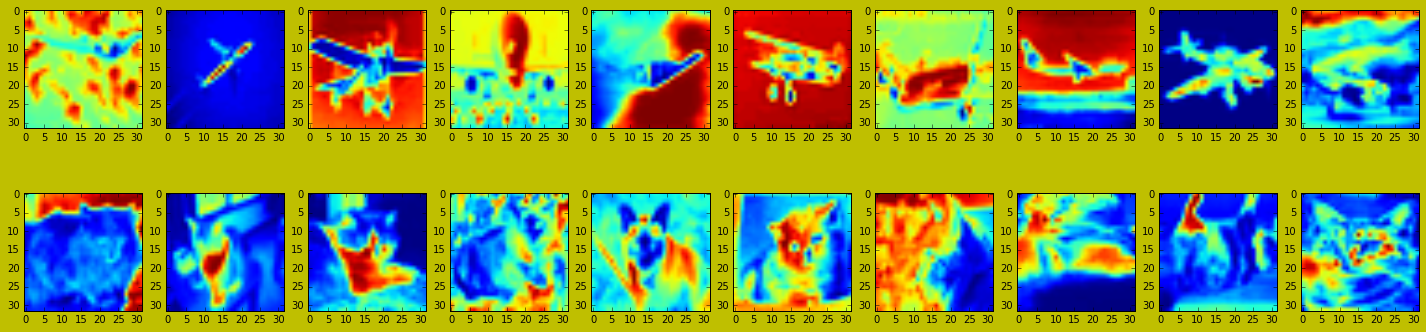

In [63]:
imageGray = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in imageArr] 
vizualize(imageGray,rows=2,columns=10)

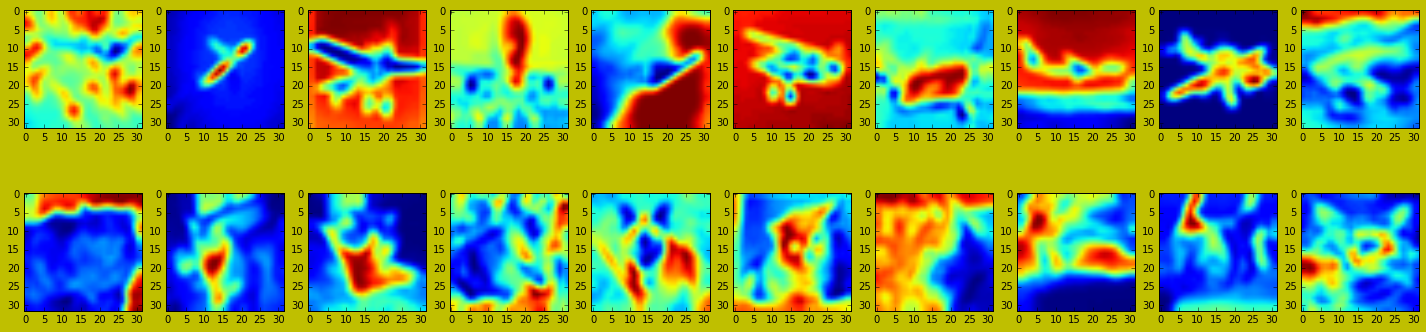

In [64]:
# Applyting Gaussian blurr blurr to the pictures
imageBlurr = [cv2.GaussianBlur(img, (3,3),3) for img in imageGray]
# A bigger value of sigma will result in better smooting. Since the image we are operating on is pretty small we would want to use a small kernel (filter) 
# and a small value of sigma
vizualize(imageBlurr,rows=2,columns=10)
# print (imageBlurr)

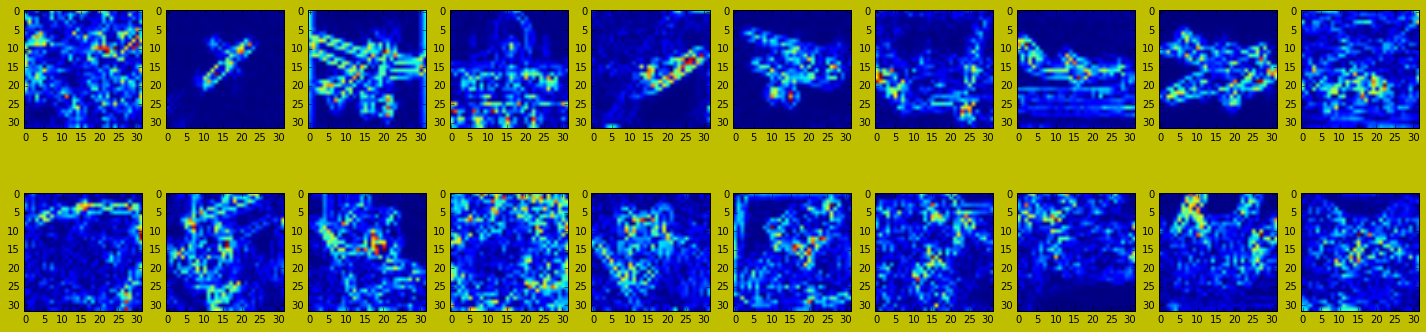

In [65]:
# Applying Edge detection Techniques, 1. Laplse Edge Detector.
imageLapEdge = [cv2.Laplacian(img, cv2.CV_64F) for img in imageGray]
imageLapEdge = np.uint8(np.absolute(imageLapEdge))
vizualize(imageLapEdge,rows=2,columns=10)

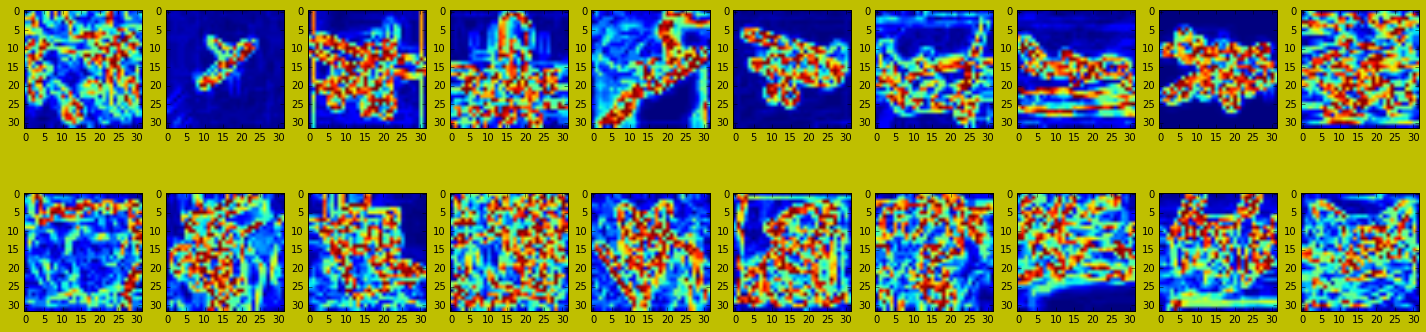

In [66]:
# Applying Edge detection Techniques, 1. Sobel Edge Detector.
# Now we shall use Sobel operator top determine the horizontal and vertical edges
def sobelEdge(img):
    sobelX= cv2.Sobel(img, cv2.CV_64F,1,0)
    sobelY= cv2.Sobel(img, cv2.CV_64F,0,1)
    sobelX = np.uint8(np.absolute(sobelX))#np.absolute(sobelX)
    sobelY = np.uint8(np.absolute(sobelY))#np.absolute(sobelY)
    sobelCombined = cv2.bitwise_or(sobelX, sobelY)
    return sobelCombined

imageSobEdge = [sobelEdge(img) for img in imageGray]
vizualize(imageSobEdge,rows=2,columns=10)

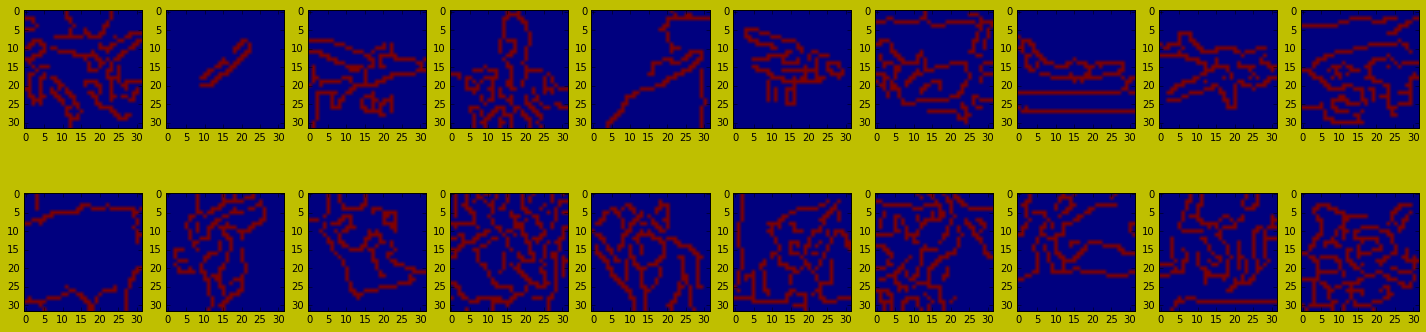

In [67]:
imageCannyEdge = [cv2.Canny(img, 30, 150) for img in imageBlurr]
vizualize(imageCannyEdge,rows=2,columns=10)

Below we skew the image , wrapaffine anf ceter the image. Have to work on it

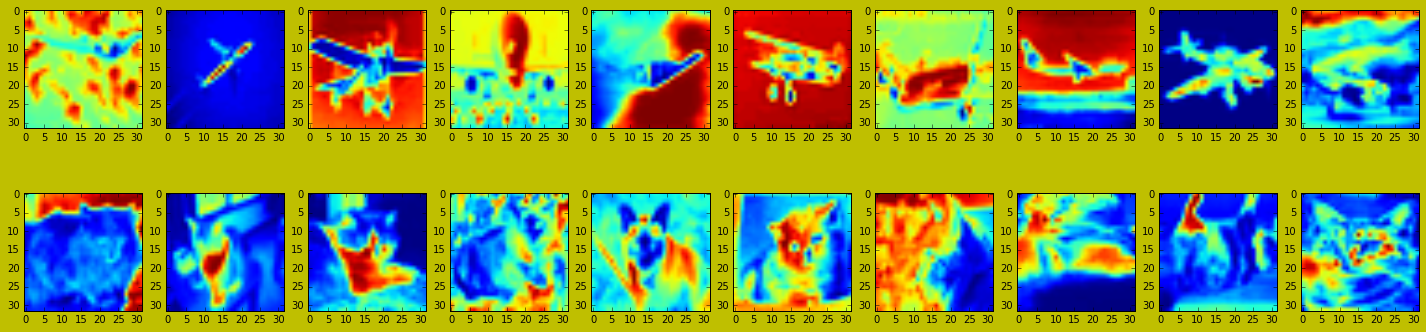

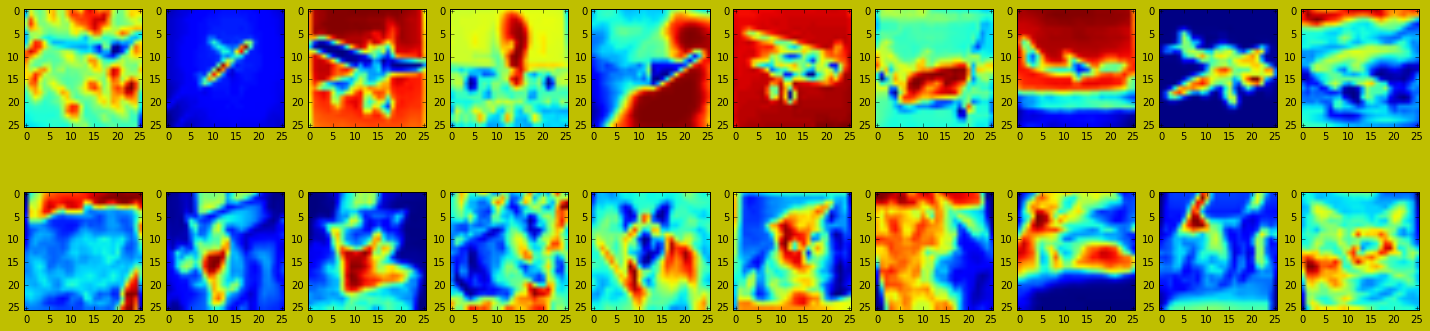

In [ ]:
# Doesnt Work, Have to re do

def deskew(image, width):
#     print (image.shape)
    (h, w) = image.shape[:2]
#     print (h, w)
    moments = cv2.moments(image)
#     print (moments)
    skew = moments["mu11"] / moments["mu02"]
#     print (skew)
    M = np.float32([[1, skew, -0.5 * w * skew],[0, 1, 0]])
#     print (M)
    image = cv2.warpAffine(image, M, (w, h),
       flags = cv2.WARP_INVERSE_MAP | cv2.INTER_LINEAR)
#     print (image.shape)
    image = imutils.resize(image, width = width)
    return image

imgSkewed = [deskew(img, width=26) for no,img in enumerate(imageGray)]
vizualize(imageGray,rows=2,columns=10)
vizualize(imgSkewed,rows=2,columns=10)

It is a good idea to center the image:

/Users/sam/App-Setup/CondaENV/lib/python3.5/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


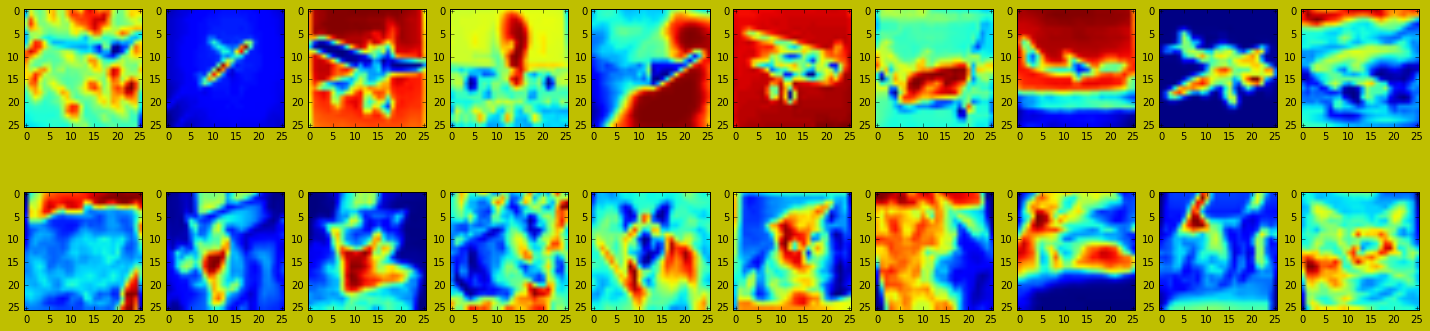

In [ ]:
# Doesnt Work, Have to re do

def center_extent(image, size):
    (eW, eH) = size
    
    if image.shape[1] > image.shape[0]:
        image = imutils.resize(image, width = eW)
    else:
        image = imutils.resize(image, height = eH)
        
    extent = np.zeros((eH, eW), dtype = "uint8")
    offsetX = (eW - image.shape[1]) / 2
    offsetY = (eH - image.shape[0]) / 2
    
    extent[offsetY:offsetY + image.shape[0], offsetX:offsetX + image.shape[1]] = image
    CM = mahotas.center_of_mass(extent)
    (cY, cX) = np.round(CM).astype("int32")
    (dX, dY) = ((size[0] / 2) - cX, (size[1] / 2) - cY)
    M = np.float32([[1, 0, dX], [0, 1, dY]])
    extent = cv2.warpAffine(extent, M, size)
    
    return extent

# image = dataset.center_extent(image, (26, 26))
imgCenter = [center_extent(img, size=(26,26)) for no,img in enumerate(imgSkewed)]
vizualize(imgSkewed,rows=2,columns=10)
vizualize(imgCenter,rows=2,columns=10)

Here in the below, we use the HOG discreptor We also print the histograms to get a intuitive sense if the parameters we use makes sense or not.

In [ ]:
from skimage.feature import hog

class HOG:
    def __init__(self, featureParams): 
        self.orienations = featureParams['orientations']
        self.pixelsPerCell = featureParams['pixelsPerCell']
        self.cellsPerBlock = featureParams['cellsPerBlock']
        self.block_norm = featureParams['block_norm']
        self.visualise = featureParams['visualise']
        self.transform_sqrt = featureParams['transform_sqrt']

    def describe(self, image):
        # Use transform_sqrt for Power law Compression before processing the image to increase the accuracy
        # Use visualise to return the image of the histogram
        hist , hog_image = hog(image,
                            orientations = self.orienations,
                            pixels_per_cell = self.pixelsPerCell,
                            cells_per_block = self.cellsPerBlock,
                            visualise= self.visualise,
                            transform_sqrt = self.transform_sqrt)
#                             normalise = self.normalize)        # normalise is deprecated from the API

        return hist, hog_image

def hog_feature(featureParams,image_in):
#     print (featureParams)
    obj_HOG = HOG(featureParams)
    for no,img in enumerate(image_in):
        hist, hog_image = obj_HOG.describe(img)
        yield hog_image
        
featureParams1 = dict(orientations = 18, pixelsPerCell = (9, 9), cellsPerBlock = (1, 1), block_norm = 'L1', visualise = True, transform_sqrt = True)
featureParams2 = dict(orientations = 18, pixelsPerCell = (4, 7), cellsPerBlock = (1, 1), block_norm = 'L1', visualise = True, transform_sqrt = True)


imageType = imageGray

hogImageArr1 = [output for output in hog_feature(featureParams1 ,imageType)]
hogImageArr2 = [output for output in hog_feature(featureParams2 ,imageType)]

vizualize(imageType,rows=2,columns=10)
vizualize(hogImageArr1,rows=2,columns=10)
vizualize(hogImageArr2,rows=2,columns=10)